La velocidad horizontal en (6.6+8j) es: 12.8026 m/s
La velocidad vertical en (6.6+8j) es: 14.8135 m/s


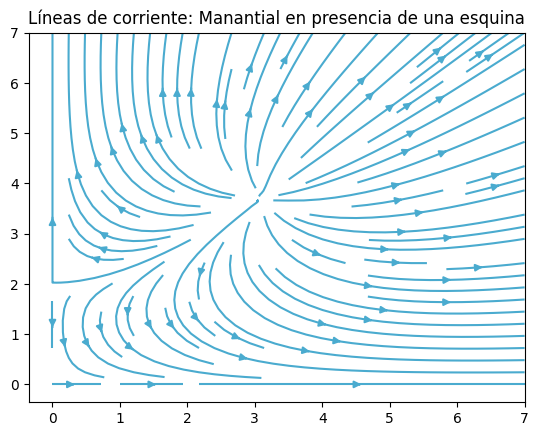

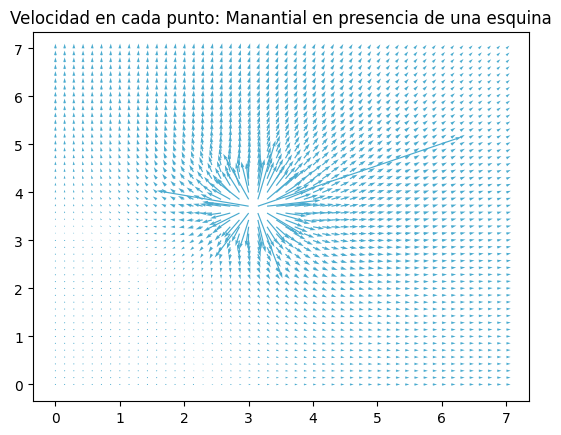

In [46]:
#Ejercicio 3: Manantial en presencia de una esquina
#Cálculo realizado derivando numéricamente el potencial complejo del flujo
import matplotlib.pyplot as plt
import cmath as c
import numpy as np

def prima(f,t,epsilon=10**(-7)):
    return (f(t+epsilon)-f(t))/(epsilon)

def uv(f,t):
    u=prima(f,t).real
    v=-prima(f,t).imag
    return u,v

def velgrid(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uv(f,t)
            U[j,i]=u
            V[j,i]=v
    return X,Y,U,V

x=np.linspace(0,7,50)
y=x
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

#Parámetros del problema
a,b=[3.1,3.7]
Q=303
tm=[a+1j*b,-a+1j*b,-a-1j*b,a-1j*b] #Para calcular el efecto de la pared, ponemos un manantial simétrico al que tenemos respecto de la pared
def manantial(t):
    f=0
    for i in range(len(tm)):
        f+=c.log(t-tm[i])
    f*=(Q/(2*c.pi))
    return f

X,Y,U,V=velgrid(manantial)

t0=6.6+8j #Punto de interés
u0,v0=uv(manantial,t0)
redon=4
print('La velocidad horizontal en',t0,'es:',round(u0,redon),'m/s')
print('La velocidad vertical en',t0,'es:',round(v0,redon),'m/s')

plt.figure()
plt.title("Líneas de corriente: Manantial en presencia de una esquina")
plt.streamplot(X,Y,U,V,color='#4aabcf')
plt.show()
plt.figure()
plt.title("Velocidad en cada punto: Manantial en presencia de una esquina")
plt.quiver(X,Y,U,V,color='#4aabcf')
plt.show()

La velocidad horizontal en (6.6+8j) es: 12.8026 m/s
La velocidad vertical en (6.6+8j) es: 14.8135 m/s


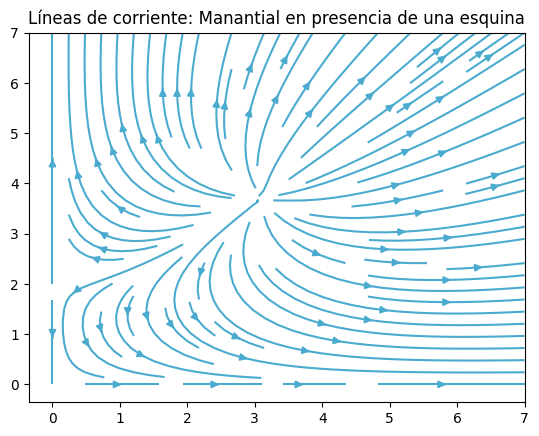

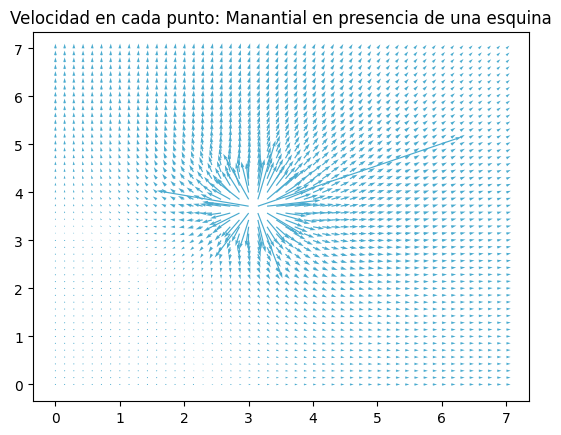

In [45]:
#Ejercicio 3: Manantial en presencia de una esquina
#Cálculo realizado a partir de la velocidad conjugada
import matplotlib.pyplot as plt
import cmath as c
import numpy as np

def velgrid(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uvman(t)
            U[j,i]=u
            V[j,i]=v
    return X,Y,U,V

x=np.linspace(0,7,50)
y=x
# y=np.linspace(-5,5,50)
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

#Parámetros del problema
a,b=[3.1,3.7]
Q=303
tm=[a+1j*b,-a+1j*b,-a-1j*b,a-1j*b] #Para calcular el efecto de la pared, ponemos un manantial simétrico al que tenemos respecto de la pared
def uvman(t):
    fc=0
    for i in range(len(tm)):
        fc+=1/(t-tm[i])
    fc*=(Q/(2*c.pi))
    return fc.real,-fc.imag

X,Y,U,V=velgrid(manantial)

t0=6.6+8j #Punto de interés
u0,v0=uvman(t0)
redon=4
print('La velocidad horizontal en',t0,'es:',round(u0,redon),'m/s')
print('La velocidad vertical en',t0,'es:',round(v0,redon),'m/s')

plt.figure()
plt.title("Líneas de corriente: Manantial en presencia de una esquina")
plt.streamplot(X,Y,U,V,color='#4aabcf')
plt.show()
plt.figure()
plt.title("Velocidad en cada punto: Manantial en presencia de una esquina")
plt.quiver(X,Y,U,V,color='#4aabcf')
plt.show()